In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [39]:
df2=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [41]:
df2 = df2.drop_duplicates()
df2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [9]:
# Handle missing values (e.g., using median imputation for numerical columns)
imputer = SimpleImputer(strategy='median')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [42]:
# Handle outlier of BMI
Q1 = df2["BMI"].quantile(0.25)
Q3 = df2["BMI"].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def temp(x):
    if x > upper_bound:
        return upper_bound  
    elif x < lower_bound:
        return lower_bound  
    else:
        return x 
df2['BMI'] = df2['BMI'].apply(temp)

# handle outlier of MentHlth

Q1 = df2["MentHlth"].quantile(0.25)
Q3 = df2["MentHlth"].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def temp(x):
    if x > upper_bound:
        return upper_bound  
    elif x < lower_bound:
        return lower_bound  
    else:
        return x 
df2['MentHlth'] = df2['MentHlth'].apply(temp)

# handle outlier of PhysHlth

Q1 = df2["PhysHlth"].quantile(0.25)
Q3 = df2["PhysHlth"].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def temp(x):
    if x > upper_bound:
        return upper_bound  
    elif x < lower_bound:
        return lower_bound  
    else:
        return x 
df2['PhysHlth'] = df2['PhysHlth'].apply(temp)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18796\945875591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BMI'] = df2['BMI'].apply(temp)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18796\945875591.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MentHlth'] = df2['MentHlth'].apply(temp)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18796\945875591.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [43]:
df2['Metabolic_Risk'] = df2['HighBP'] + df2['HighChol'] + (df2['BMI'] > 30).astype(int)
df2['Lifestyle_Score'] = df2['PhysActivity'] - df2['Smoker'] - (df2['Veggies'] < 1).astype(int)
df2['Age_BMI_Interaction'] = df2['Age'] * (df2['BMI'] / 10)
df2['BP_Age'] = df2['HighBP'] * (df2['Age'] / 10)
df2['Health_Risk'] = df2['Metabolic_Risk'] + (df2['GenHlth'] > 3).astype(int) + (df2['PhysHlth'] > 7).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18796\878503397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Metabolic_Risk'] = df2['HighBP'] + df2['HighChol'] + (df2['BMI'] > 30).astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18796\878503397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lifestyle_Score'] = df2['PhysActivity'] - df2['Smoker'] - (df2['Veggies'] < 1).astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18796\878503397.py:3: SettingWithCopyWarning: 
A value is tryin

In [46]:
df2.columns.to_list()

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income',
 'Metabolic_Risk',
 'Lifestyle_Score',
 'Age_BMI_Interaction',
 'BP_Age',
 'Health_Risk']

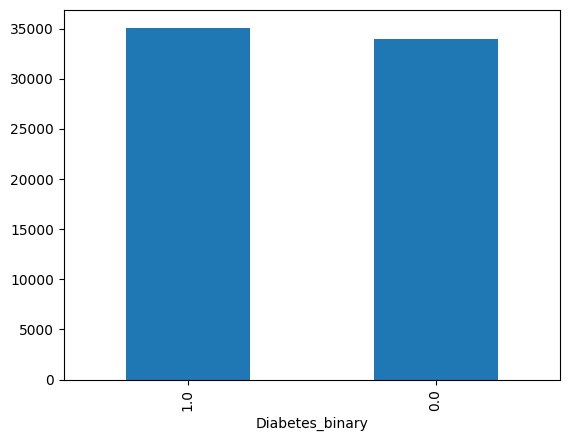

In [47]:
df2["Diabetes_binary"].value_counts().plot(kind='bar')
plt.show()

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer

In [49]:
X = df2.drop(columns=['Diabetes_binary'])
y = df2['Diabetes_binary']

In [50]:
# Convert all features to float32 and ensure target is int
X = X.astype('float32')
y = y.astype('int32')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size=0.3, stratify=y, random_state=42
)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = {i: w for i, w in zip(classes, weights)}
print(f"Class weights: {class_weights}")

Class weights: {0: 1.0167213528520949, 1: 0.9838197582122359}


In [68]:
def create_diabetes_model(input_shape):
    model = tf.keras.Sequential([
        InputLayer(shape=(input_shape,)),  # Correct way to specify input shape

        layers.Dense(128, activation='relu'),
        
        layers.Dense(64, activation='relu'),
        
        layers.Dense(32, activation='relu'),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.Precision(name='precision')

        ]
    )
    return model

In [69]:
model = create_diabetes_model(X_train_scaled.shape[1])

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7174 - loss: 0.5576 - precision: 0.7132 - recall: 0.7356 - val_accuracy: 0.7503 - val_loss: 0.5150 - val_precision: 0.7253 - val_recall: 0.8188
Epoch 2/200
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7474 - loss: 0.5108 - precision: 0.7309 - recall: 0.8040 - val_accuracy: 0.7493 - val_loss: 0.5113 - val_precision: 0.7389 - val_recall: 0.7836
Epoch 3/200
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7556 - loss: 0.4993 - precision: 0.7383 - recall: 0.8029 - val_accuracy: 0.7502 - val_loss: 0.5101 - val_precision: 0.7326 - val_recall: 0.8008
Epoch 4/200
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7534 - loss: 0.5046 - precision: 0.7348 - recall: 0.8018 - val_accuracy: 0.7500 - val_loss: 0.5103 - val_precision: 0.7212 - val_recall: 0.8282
Epoch 5/200
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7531 - loss: 0.5045 - precision: 0.7327 - recall: 0.8085 - val_accuracy: 0.7

In [70]:
# 7. Evaluate
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     10188
           1       0.71      0.71      0.71     10530

    accuracy                           0.71     20718
   macro avg       0.71      0.71      0.71     20718
weighted avg       0.71      0.71      0.71     20718


Confusion Matrix:
[[7140 3048]
 [3048 7482]]
